In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("Advertising.csv")

In [5]:
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [6]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [8]:
df.shape

(200, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
 df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


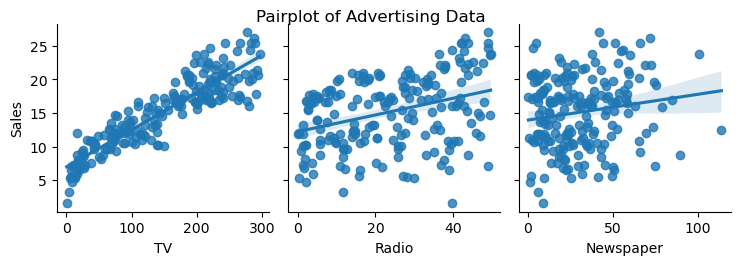

In [11]:
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")
plt.suptitle('Pairplot of Advertising Data', y=1.02)
plt.show()

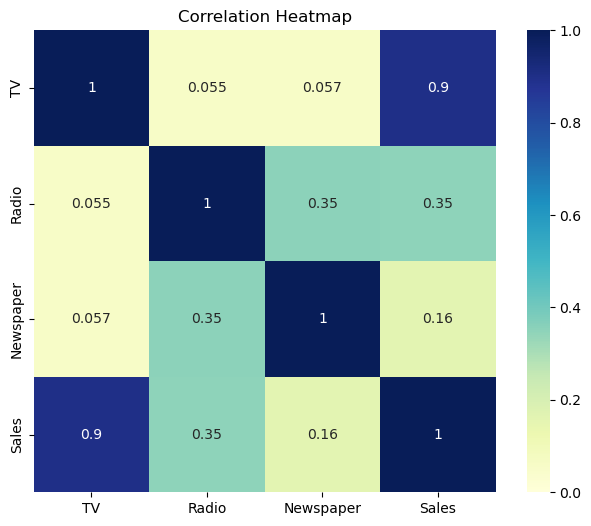

In [12]:
corrmat = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corrmat, annot=True, cmap="YlGnBu", vmin=0, vmax=1, square=True)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [19]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [21]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

In [15]:
X_train = sm.add_constant(X_train)  
model = sm.OLS(y_train, X_train).fit()

In [16]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     489.2
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           4.19e-79
Time:                        22:07:18   Log-Likelihood:                -307.74
No. Observations:                 160   AIC:                             623.5
Df Residuals:                     156   BIC:                             635.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5980      0.343     13.406      0.0

In [22]:
X_test = sm.add_constant(X_test)  
y_pred = model.predict(X_test)

In [23]:
X_test

,const,TV,Radio,Newspaper
123,1.0,123.1,34.6,12.4
37,1.0,74.7,49.4,45.7
4,1.0,180.8,10.8,58.4
138,1.0,43.0,25.9,20.5
17,1.0,281.4,39.6,55.8
145,1.0,140.3,1.9,9.0
177,1.0,170.2,7.8,35.2
90,1.0,134.3,4.9,9.3
83,1.0,68.4,44.5,35.6
110,1.0,225.8,8.2,56.5


In [24]:
y_pred

123    15.072942
37     14.134829
4      15.547703
138     9.802572
17     24.160206
145    12.355845
177    14.632658
90     12.367404
83     13.245804
110    17.676377
134    10.910312
111    21.832133
8       5.294552
169    21.063898
25     19.129544
51     11.065491
151    12.061218
12      9.816647
106     7.180824
113    18.163580
157    12.807178
95     16.919680
91      6.318444
62     19.200493
78      8.221214
74     18.814286
26     15.547431
5      10.545524
165    17.623498
52     20.891952
24      9.358485
194    16.611056
153    18.243999
181    16.958120
70     18.725923
103    16.622100
43     16.668014
27     19.374937
10      8.808675
96     15.612663
dtype: float64

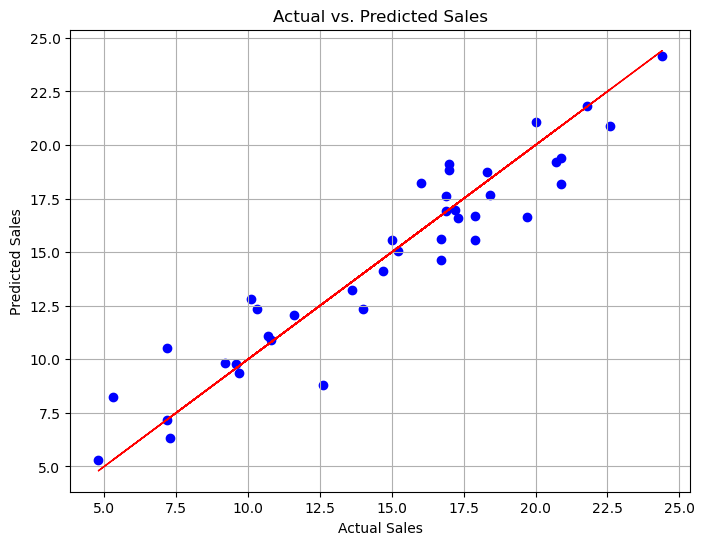

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=1)
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid()
plt.show()

In [26]:
new_data = pd.DataFrame({'TV': [100, 25], 'Radio': [50, 63], 'Newspaper': [25, 80]})
new_data = sm.add_constant(new_data)  
predicted_sales = model.predict(new_data)
print("\nPredicted Sales for new data:")
print(predicted_sales)


Predicted Sales for new data:
0    15.551579
1    12.993740
dtype: float64
